

# Graphics



An English cliché says "One picture is worth ten thousand words".
John Tukey, a renowned mathematical statistician, was one of the pioneers of statistical graphs
in the computer era. Nowadays, powerful software is able to produce dazzling statistical graphs,
sometimes web-based and interactive. Outside of academia, journalism hooks a wide readership with
professional data-based graphs. New York Times and The Economists are first-rate examples;
South China Morning Post sometimes also does a respectable job.
A well designed statistical graph can deliver an intuitive and powerful message.
I consider graph prior to table when writing a research report or an academic paper.
Graph is lively and engaging. Table is tedious and boring.

We have seen an example of R graph in the OLS regression linear example in Lecture 1.
`plot` is a generic command for graphs, and is the default R graphic engine.
It is capable of producing preliminary statistical graphs.

Over the years, developers all over the world have had many proposals for
more sophisticated statistical graphs. Hadley Wickham's 
`ggplot2` is among the most successful. 

`ggplot2` is an advanced graphic system that generates high-quality statistical graphs.
It is not possible to cover it in a lecture. Fortunately, the author wrote a comprehensive reference
[**ggplot2 book**](http://link.springer.com/book/10.1007%2F978-0-387-98141-3),
which can be downloaded via the CUHK campus network (VPN needed).

`ggplot2` accommodates data frames of a particular format. `reshape2` is a package that helps prepare the data frames for `ggplot2`.

The workflow of ggplot is to add the elements in a graph one by one, and then print out
the graph all together.
In contrast, `plot` draws the main graph at first, and then adds the supplementary elements later.

`ggplot2` is particularly good at drawing multiple graphs, either of the same pattern or of
different patterns. Multiple subgraphs convey rich information and easy comparison.


**Example**

Plot the density of two estimators under three different data generating processes.
This is an example to generate subgraphs of the same pattern.


      typb           b1        b1_c
12001   FE  0.124616242  0.11690387
12002   FE  0.267670157  0.25202802
12003   FE -0.030689329 -0.03976746
12004   FE  0.121169923  0.11866138
12005   FE  0.008300031 -0.02399673
12006   FE -0.026199118 -0.05231120
  typb estimator        value
1   FE        b1  0.124616242
2   FE        b1  0.267670157
3   FE        b1 -0.030689329
4   FE        b1  0.121169923
5   FE        b1  0.008300031
6   FE        b1 -0.026199118


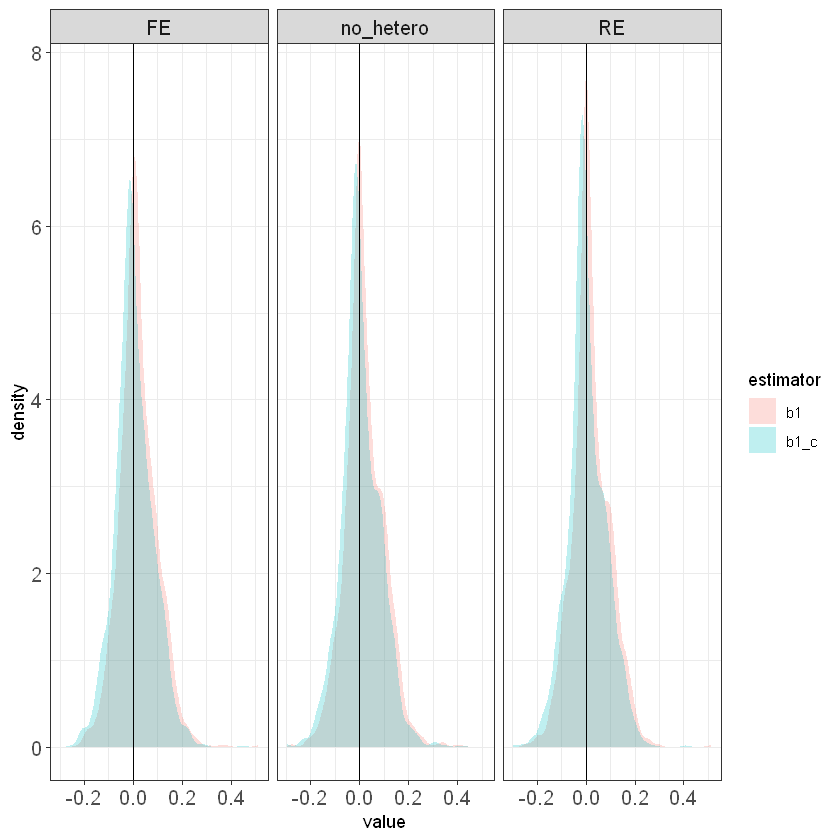

In [1]:
load("data_example/big150.Rdata")
library(ggplot2)
library(reshape2)

big150_1 <- big150[, c("typb", "b1", "b1_c")]
print(head(big150_1))

big150_1 <- melt(big150_1, id.vars = "typb", measure.vars = c("b1", "b1_c"))
names(big150_1)[2] <- c("estimator")
print(head(big150_1))

p1 <- ggplot(big150_1)
p1 <- p1 + geom_area(
  stat = "density", alpha = .25,
  aes(x = value, fill = estimator), position = "identity"
)
p1 <- p1 + facet_grid(. ~ typb)
p1 <- p1 + geom_vline(xintercept = 0)
p1 <- p1 + theme_bw()
p1 <- p1 + theme(
  strip.text = element_text(size = 12),
  axis.text = element_text(size = 12)
)
print(p1)


The function `ggplot` specifies which dataset to use for the graph. `geom_***` determines the shape to draw, for example scatter dots, lines, curves or areas. `theme` is to tune the supplementary elements like the background, the size and font of the axis text and so on.


**Example**

This example aligns two graphs of different patterns in one page.
Similar graphs appear in @shi2018structural.


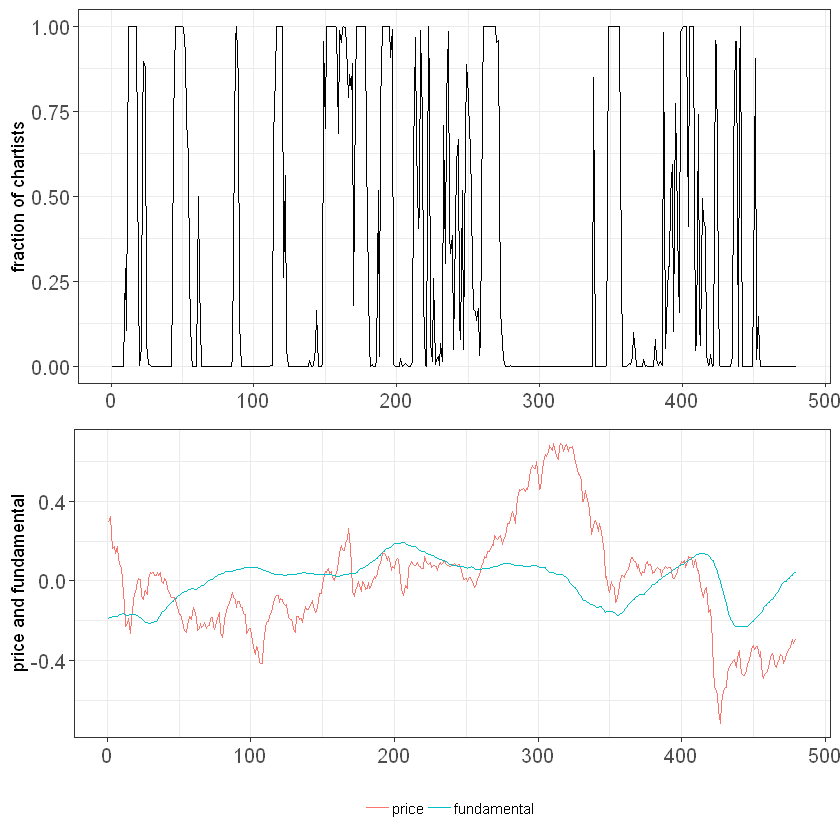

In [3]:
# graph packages
library(lattice)
library(ggplot2)
library(reshape2)
library(gridExtra)

load("data_example/multigraph.Rdata") # load data


# unify the theme in the two graphs
theme1 <- theme_bw() + theme(
  axis.title.x = element_blank(),
  strip.text = element_text(size = 12),
  axis.text = element_text(size = 12),
  legend.position = "bottom", legend.title = element_blank()
)

# sub-graph 1
d1 <- data.frame(month = 1:480, m = m_vec)
p1 <- qplot(x = month, y = m, data = d1, geom = "line")
p1 <- p1 + theme1 + ylab("fraction of chartists")


# sug-graph 2
d2$month <- 1:480
p2 <- ggplot(d2)
p2 <- p2 + geom_line(aes(x = month, y = value, col = variable))
p2 <- p2 + theme1 + ylab("price and fundamental")

# generate the grahp
grid.arrange(p1, p2, nrow = 2)


In order to unify the theme of the two distinctive subgraphs,
we define an object `theme1` and apply it in both graphic objects
`p1` and `p2`.

### Interactive Graph

In the folder of `data_example`, we give a preliminary example 
of `flexdashboard`. It is very easy to convert a ggplot2 graph 
into an HTML interactive graph by `plotly::ggplotly()`.



### Future writing plan

* Shiny app [tutorial](https://shiny.rstudio.com/tutorial/). I have included a shiny app in `data_example/shiny`.


